In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Import Libraries
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

print("Libraries Imported Successfully")

Libraries Imported Successfully


In [2]:
# Read Fish marketing data
df = pd.read_csv("../../../0.Databases/Fish-Market-dataset/Fish.csv")

In [3]:
# Display the first few rows
df.head()

# Get a summary of the dataset
# print(df.info())

# Check for missing values
# print(df.isnull().sum())

# Get descriptive statistics
# print(df.describe())

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
# Data Preprocessing

# Encode categorical column 'Species' using one-hot encoding
df = pd.get_dummies(df, columns=["Species"], drop_first=True)

# •	The Species column is a categorical variable that likely contains labels like different species of animals or plants. Since machine learning models typically require numerical inputs, this column needs to be transformed.
# •	One-hot encoding is a technique used to convert categorical variables into binary columns (0s and 1s).
# •	Example: If the Species column contains values like Cat, Dog, Rabbit, it will be split into separate columns like Species_Dog, Species_Rabbit, with binary values (1 if that species is present, 0 otherwise).
# •	The argument drop_first=True is used to avoid the dummy variable trap by dropping one of the encoded columns. This reduces multicollinearity and keeps the dataset concise.

# Define feature set (X) and target variable (y)
# It drops the "Weight" column from the DataFrame and assigns the remaining columns to X.
# axis=1 specifies that the column should be dropped.
X = df.drop("Weight", axis=1)

# Target variable (y)
# Select the target variable "Weight" from the DataFrame and assign it to y.
# This is the variable that the model will be trying to predict.
y = df["Weight"]

# Reshape the target variable y
# Reshape the target variable y into a 1D array
# This is done using the values attribute and the reshape method, it is a common practice in machine learning to reshape the target variable.
# This is because many machine learning algorithms expect the target variable to be in a specific shape, often a 1D array.
# It is used to ensure that the target variable is in the correct format for the model to be trained.
# y = y.values.reshape(-1, 1)

# Print shape
# Print the shape of the feature set X and target variable y
# print(X.shape, y.shape)

In [5]:
df.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,False,False,False,False,False,False
1,290.0,24.0,26.3,31.2,12.4800,4.3056,False,False,False,False,False,False
2,340.0,23.9,26.5,31.1,12.3778,4.6961,False,False,False,False,False,False
3,363.0,26.3,29.0,33.5,12.7300,4.4555,False,False,False,False,False,False
4,430.0,26.5,29.0,34.0,12.4440,5.1340,False,False,False,False,False,False


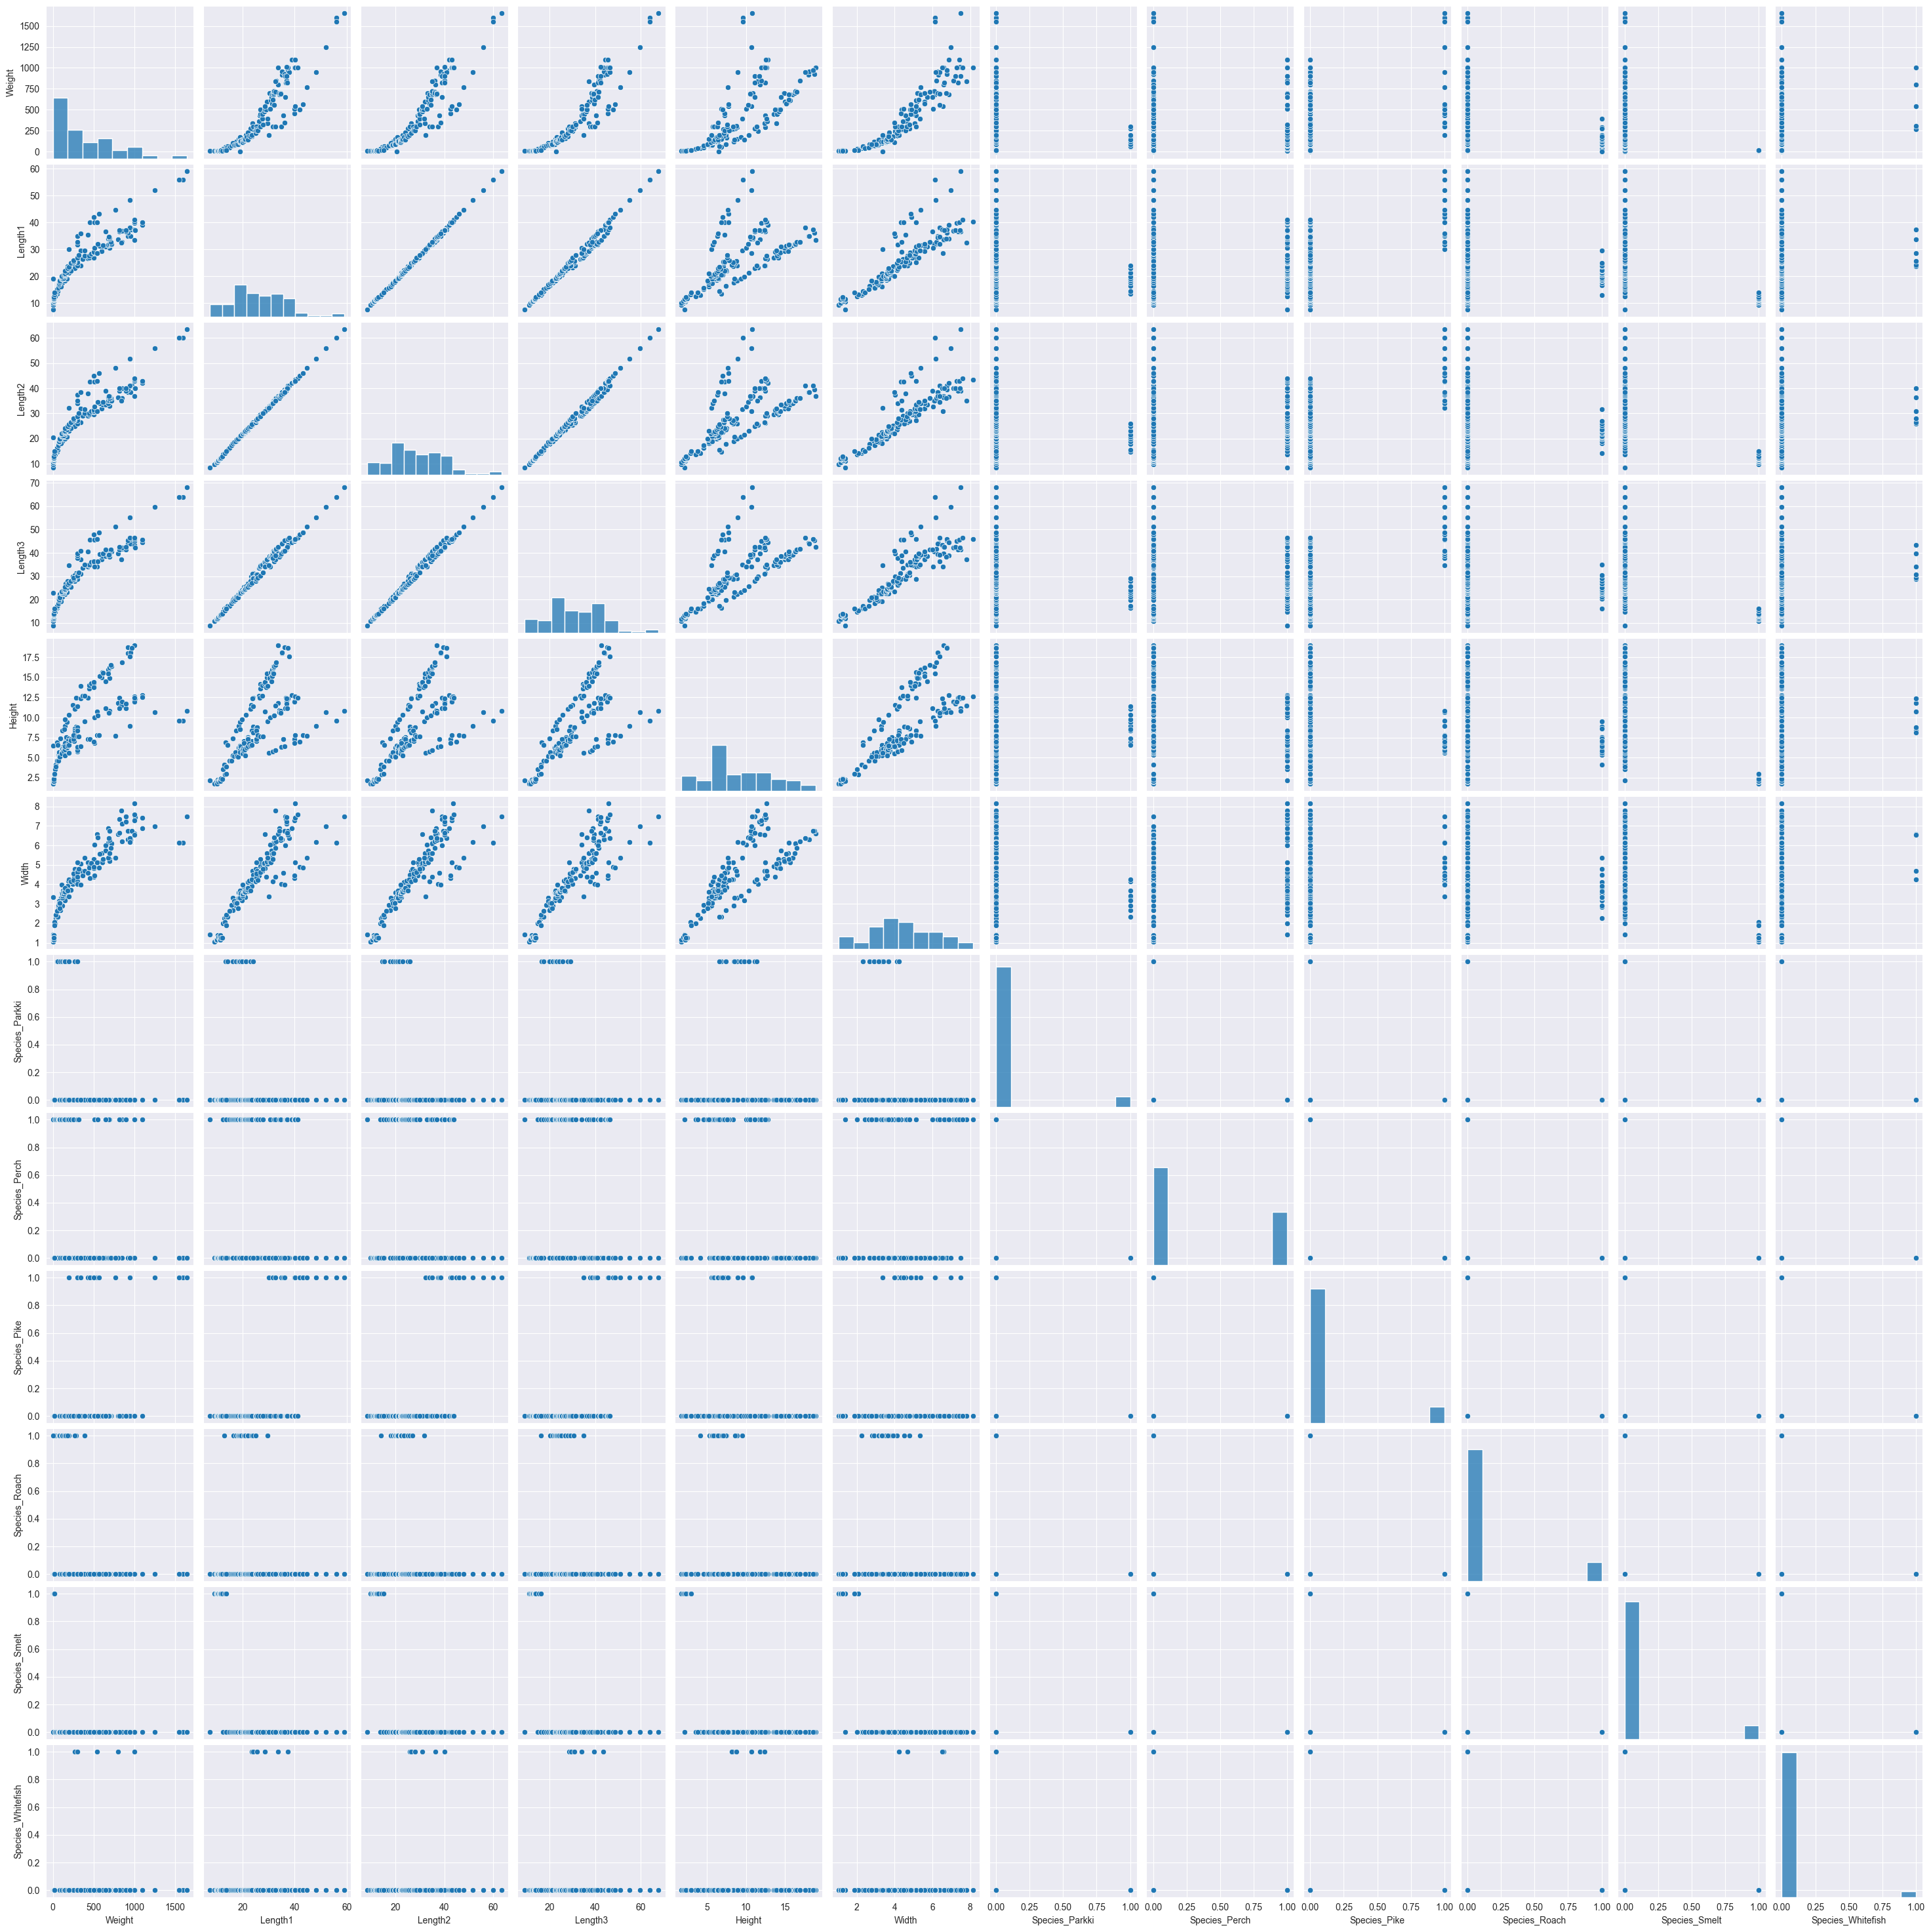

In [6]:
# 6. Visualize Relationships (Optional but Recommended)
# Pairplot to visualize correlations between variables
sns.pairplot(df)
plt.show()

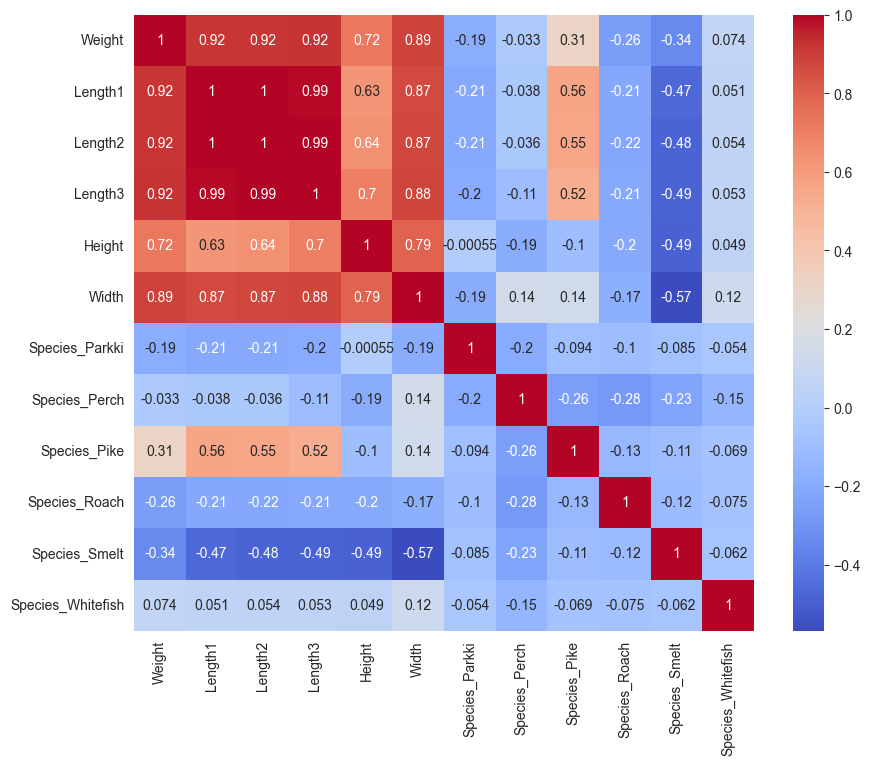

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [8]:
# 7. Split the Dataset
# We split the dataset into training and testing sets using an 80-20 split.
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
# 8. Train the Linear Regression Model
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# 9. Make Predictions
# Predict on the test data
y_pred = model.predict(X_test)
print(y_pred)

[  18.73825424   11.88642049  187.71128095  332.73989462  212.09701648
  757.76161609  -61.14301932  255.77252524  260.49479187 1148.32283034
  600.42812967  852.95666864  541.6348983   140.05796526  680.96324928
  818.78498332 1009.77141718  289.70475993  226.06716705  585.13887424
  -11.02265194  585.70704112  509.58219989  492.02110639  814.27086551
  964.09005079  219.24045431  356.93819832  -90.40664262  -11.87462241
  575.80799591  -18.41252664]


In [11]:
# Evaluate the model
# The MAE measures the average absolute difference between the predicted values and the actual values. A smaller MAE indicates better model performance.
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 65.30005153357348


In [12]:
# 10. Evaluate the Model
# MSE is another way to measure prediction error by averaging the squared differences between predicted and actual values.
# After making predictions, evaluate the model using common regression metrics like Mean Squared Error (MSE) and R-squared (R²).
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7007.383189853781


In [13]:
# R-squared is a statistical measure that indicates how close the data is to the fitted regression line. It ranges from 0 to 1, where a value closer to 1 indicates a better fit.
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9507352480054524


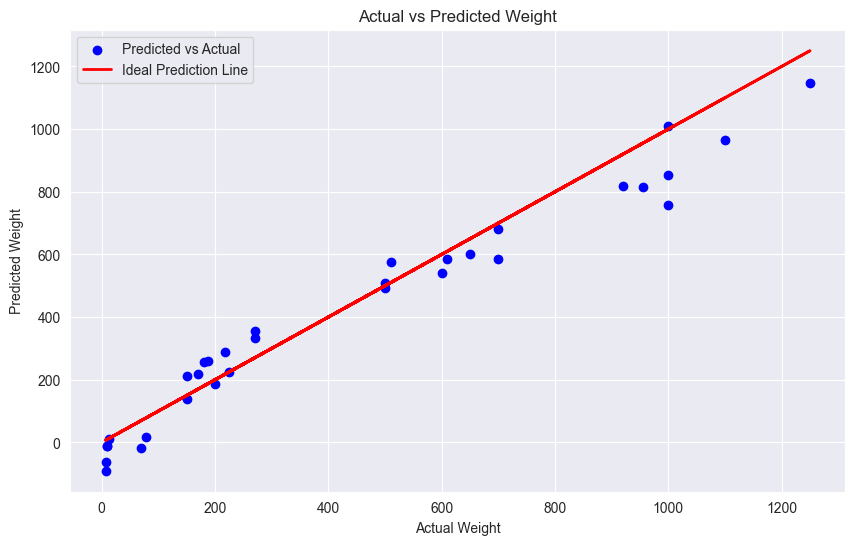

In [16]:
# 11. Visualize the Results
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="Predicted vs Actual", color="blue")
plt.plot(
    y_test, y_test, color="red", linewidth=2, label="Ideal Prediction Line"
)  # Ideal line
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Weight")
plt.legend()
plt.show()

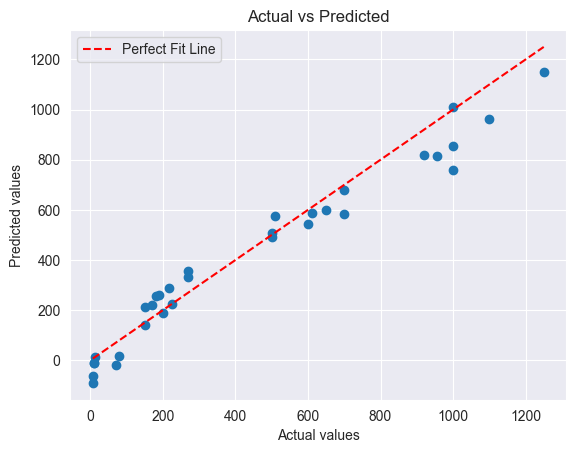

In [17]:
# Scatter plot of Actual vs Predicted
plt.scatter(y_test, y_pred)

# Line representing perfect predictions
line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(line, line, color="red", linestyle="--", label="Perfect Fit Line")

# Add labels and title
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted")

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [18]:
# 12. Check Model Coefficients
# Print model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [ -59.1395506    55.61529428   39.05378679  -10.73045193    7.22621264
  139.56242576   74.67079989 -331.37548435   34.99483542  330.68647533
   47.64152441]
Model Intercept: -826.8181491630851


In [19]:
# Data Exploration
import seaborn as sns

# Summary Statistics: Use fish_data.describe() to get an overview of your dataset.
# Correlation Matrix: Visualize the correlation between features using a heatmap.

df["Species"] = df["Species"].astype("category").cat.codes


plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

KeyError: 'Species'

In [20]:
# Feature Engineering
# Normalization/Standardization: Scale your features if they have different units or ranges.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Model Evaluation
# Cross-Validation: Use K-fold cross-validation to assess the model's performance more robustly.

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring="r2")
print(f"Cross-validated R^2 scores: {scores}")
print(f"Mean R^2 score: {scores.mean()}")

Cross-validated R^2 scores: [  0.30866139   0.27747547 -11.11448601   0.87255345   0.14293616]
Mean R^2 score: -1.902571909097856


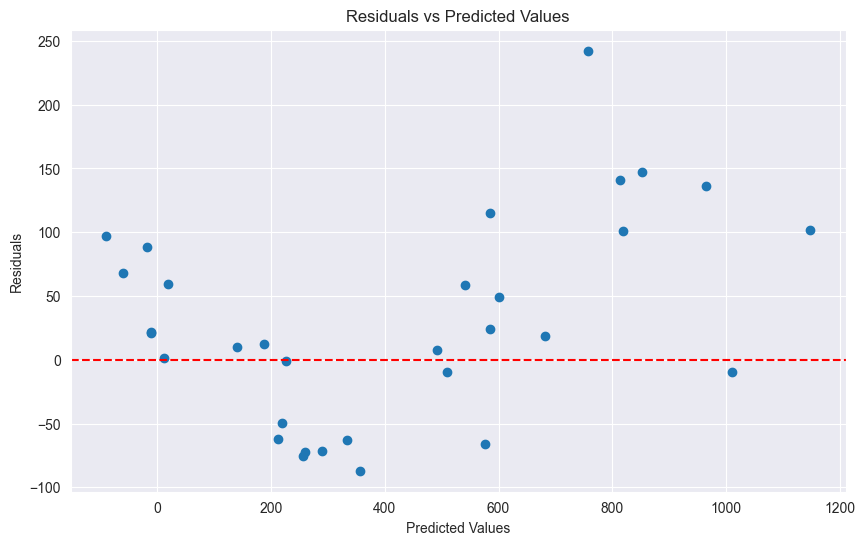

In [22]:
# Residual Analysis
# Plot Residuals: Analyze the residuals to check for patterns. Ideally, they should be randomly distributed.

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

In [23]:
# Model Improvement
# Regularization: Explore Lasso or Ridge regression to prevent overfitting.

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

/Users/pankajkumar/.local/share/virtualenvs/AI-Engineer-Roadmap-9EaXoWEH/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.373e+05, tolerance: 1.561e+03
  model = cd_fast.enet_coordinate_descent(


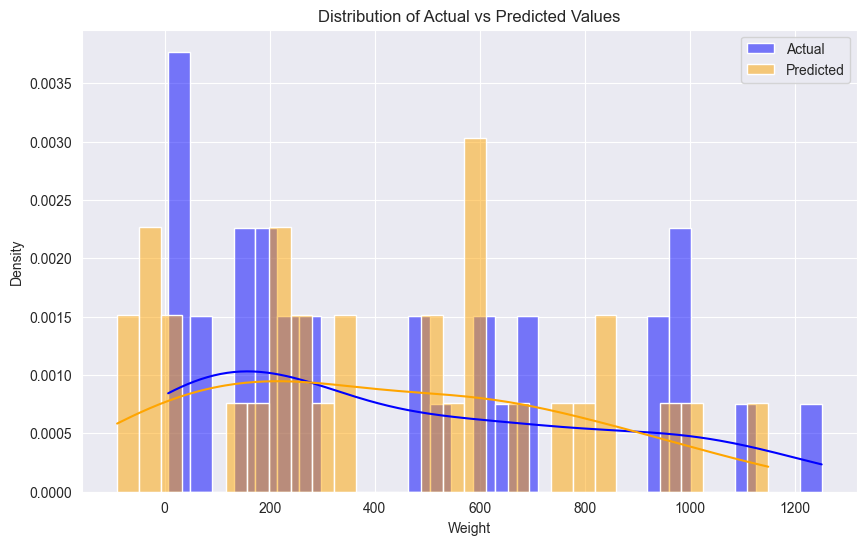

In [24]:
# Additional Visualizations
# Distribution Plots: Check the distribution of the target variable or residuals.

plt.figure(figsize=(10, 6))
sns.histplot(y_test, kde=True, color="blue", label="Actual", stat="density", bins=30)
sns.histplot(
    y_pred, kde=True, color="orange", label="Predicted", stat="density", bins=30
)
plt.title("Distribution of Actual vs Predicted Values")
plt.legend()
plt.show()

In [ ]:
# Save and Load Model
# Model Persistence: Save your trained model for later use with joblib or pickle.

import joblib

joblib.dump(model, "linear_regression_model.pkl")

In [37]:
# 13. Save the Model (Optional)
import pickle

# Save the model to disk
filename = "linear_regression_model.pkl"
pickle.dump(model, open(filename, "wb"))

In [39]:
# Load the model from the .pkl file
filename = "linear_regression_model.pkl"  # Update with your actual file name
with open(filename, "rb") as file:
    loaded_model = pickle.load(file)


# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test)

# Print the predictions
print("Predictions:", predictions)

Predictions: [  18.73825424   11.88642049  187.71128095  332.73989462  212.09701648
  757.76161609  -61.14301932  255.77252524  260.49479187 1148.32283034
  600.42812967  852.95666864  541.6348983   140.05796526  680.96324928
  818.78498332 1009.77141718  289.70475993  226.06716705  585.13887424
  -11.02265194  585.70704112  509.58219989  492.02110639  814.27086551
  964.09005079  219.24045431  356.93819832  -90.40664262  -11.87462241
  575.80799591  -18.41252664]


In [37]:
import pandas as pd

myData = [
    {
        "name": "Alice",
        "age": 30,
        "address": {"street": "123 Maple St", "city": "Springfield", "state": "IL"},
        "hobbies": ["reading", "hiking"],
    },
    {
        "name": "Bob",
        "age": 25,
        "address": {"street": "456 Oak St", "city": "Greenfield", "state": "CA"},
        "hobbies": ["cooking", "gaming"],
    },
]

print("Library loaded successfully")

data = pd.json_normalize(myData)
print(data)

Library loaded successfully
    name  age            hobbies address.street address.city address.state
0  Alice   30  [reading, hiking]   123 Maple St  Springfield            IL
1    Bob   25  [cooking, gaming]     456 Oak St   Greenfield            CA
